In [75]:
import pandas as pd

dataset = pd.read_csv('Phising_Training_Dataset.csv')

ds = dataset.iloc[:, 1:32] 
# print(ds.iloc[:, 30:])
ds.iloc[:, 30:].replace(-1,0,inplace=True)
# print(ds.iloc[:, 30:])


x = dataset.iloc[:, 1:31].values
y = dataset.iloc[:, 31:].values

# print(x.shape, y.shape)

for i in y:
    if i[0] == -1:
        i[0] = 0

corr = ds.corr()
print(corr)

                             having_IP  URL_Length  Shortining_Service  \
having_IP                     1.000000   -0.053184            0.399121   
URL_Length                   -0.053184    1.000000           -0.102147   
Shortining_Service            0.399121   -0.102147            1.000000   
having_At_Symbol              0.162727   -0.070171            0.112393   
double_slash_redirecting      0.388331   -0.083623            0.841223   
Prefix_Suffix                -0.010055    0.053664           -0.088494   
having_Sub_Domain            -0.083055   -0.004870           -0.033567   
SSLfinal_State                0.071759    0.048650           -0.061707   
Domain_registeration_length  -0.024847   -0.221207            0.055415   
Favicon                       0.086203   -0.046556            0.005180   
port                          0.065463   -0.000149           -0.001731   
HTTPS_token                   0.346835   -0.095062            0.751194   
Request_URL                   0.032203

c:\Users\kalra_m\Anaconda3\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# pca = PCA(n_components=2)
# x_train_scaled = pca.fit_transform(x_train)

pca = PCA(n_components=2, whiten=True).fit(ds)
x_pca = pca.transform(ds)

# print(x_train_scaled[:10])
# pca2 = PCA(n_components=2)
# x_test_scaled = pca2.fit_transform(x_test)


[[-0.1984086   0.06962544 -0.19099832 -0.19467446 -0.19304069  0.03693641
   0.02022478  0.02753974 -0.07553351 -0.38726376 -0.31626106 -0.21034502
   0.03775739 -0.01249512  0.08845789  0.02477778 -0.34474302 -0.22418966
   0.0512647  -0.27327456 -0.11113119 -0.39254855 -0.21719422  0.04582753
  -0.18817704  0.04031019 -0.01634909 -0.04250817  0.08550211 -0.15151159
   0.01167555]
 [ 0.02596988 -0.1714236   0.13858459 -0.04840822  0.13057964 -0.15176867
  -0.18328127 -0.39635118  0.3949955  -0.1149197  -0.12261283  0.12926452
  -0.43761934 -0.27201648 -0.12643849 -0.14949623 -0.11009593  0.12153584
  -0.02874552 -0.08450135 -0.0360032  -0.11077381 -0.07658651 -0.21956806
   0.01945961 -0.22382275 -0.07369003 -0.01521466  0.01420547 -0.04762201
  -0.22737751]]


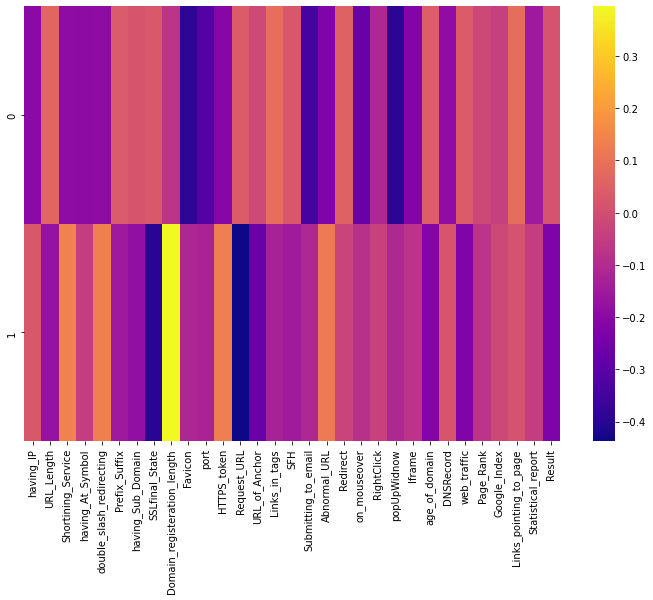

In [78]:
import matplotlib.pyplot as plt

# plt.scatter(x_train_scaled, y_train)
# plt.show()
import seaborn as sns


plt.figure(figsize=(12,8))
sns.heatmap(df_comp, cmap="plasma")
print(pca.components_)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

y_preds = gb.predict(x_test)

print(confusion_matrix(y_test, y_preds))

c:\Users\kalra_m\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[[711  45]
 [ 38 997]]


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score


train = xgb.DMatrix(x_train, label=y_train)
test = xgb.DMatrix(x_test, label=y_test)
param = {
    'max_depth': 12,
    'eta': 0.33,
    'objective': 'multi:softmax',
    'num_class': 2} 
epochs = 30 

model = xgb.train(param, train, epochs)
y_predsx = model.predict(test)
print(confusion_matrix(y_test, y_predsx))
print(accuracy_score(y_test, y_predsx))

xgbst = xgb.XGBClassifier()
xgbst.fit(x_train, y_train)
y_predsx2 = xgbst.predict(x_test)

print(confusion_matrix(y_test, y_predsx2))
print(accuracy_score(y_test, y_predsx2))

[15:39:20] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[ 733   23]
 [  26 1009]]
0.972640982691234
[15:39:21] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\kalra_m\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\kalra_m\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[[ 733   23]
 [  22 1013]]
0.9748743718592965
